## Initialization

In [1]:
# load packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, RocCurveDisplay, roc_curve, roc_auc_score, classification_report, auc
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedShuffleSplit
import xgboost as xgb
from xgboost import plot_importance 
from sklearn.ensemble import BaggingClassifier, StackingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from itertools import cycle
from sklearn.preprocessing import label_binarize, MinMaxScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.utils import resample, class_weight

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.models import Model, Sequential
from tensorflow.python.keras.utils import layer_utils, np_utils

print('------------')
print('### Python version: ' + __import__('sys').version)
print('### NumPy version: ' + np.__version__)
print('### Scikit-learn version: ' + sklearn.__version__)
print('------------')

/scratch/local/29429563/ipykernel_1630421/1816009067.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-04-19 13:13:01.910582: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


------------
### Python version: 3.11.8 | packaged by conda-forge | (main, Feb 16 2024, 20:53:32) [GCC 12.3.0]
### NumPy version: 1.26.4
### Scikit-learn version: 1.4.1.post1
------------


In [2]:
# set the seed.
seed = 42
np.random.seed(seed)

In [3]:
# Read dataset.
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [4]:
df.duplicated().sum()

23899

In [5]:
df.drop_duplicates(inplace = True)

In [6]:
df.duplicated().sum()

0

In [7]:
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [8]:
# Split the data into features (X) and the target variable (y)
X = df.drop(['Diabetes_012'], axis=1)
y = df['Diabetes_012']

print(X.shape)
print(y.shape)

(229781, 21)
(229781,)


In [9]:
# Scale features using min-max scaler
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

In [10]:
# Split the data into train-validation-test sets: 90-0.05-0.05
train_x, temp_x, train_y, temp_y = train_test_split(scaled_X, y, test_size=0.1, random_state=seed)
val_x, test_x, val_y, test_y = train_test_split(temp_x, temp_y, test_size=0.5, random_state=seed)

In [11]:
# see distribution of target variable (class imbalances)
class_distribution = np.bincount(train_y)

# Calculate the percentage of each class in the training set
class_percentages = class_distribution / class_distribution.sum() * 100
print(class_percentages) # Clearly the data is imbalanced

[82.69697585  2.01448729 15.28853686]


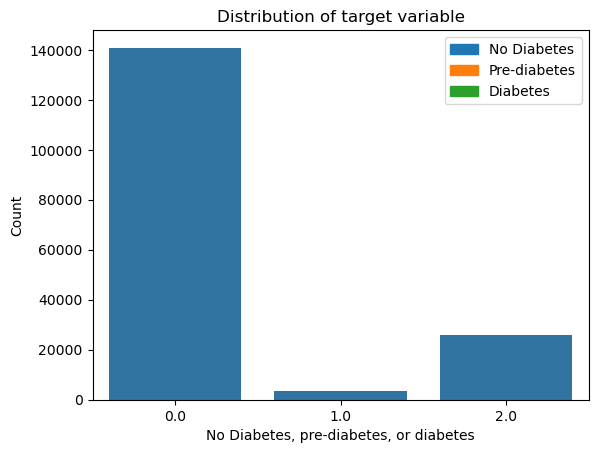

In [12]:
# visualize train data class distributions 
target_col = df.columns[0]
df_excluded = df.drop(columns=[target_col])
train_df = pd.DataFrame(train_x, columns=df_excluded.columns)
train_df['Diabetes_012'] = train_y 

sns.countplot(x='Diabetes_012', data=train_df)
plt.xlabel('No Diabetes, pre-diabetes, or diabetes')
plt.ylabel('Count')
plt.title('Distribution of target variable')

legend_labels = ['No Diabetes', 'Pre-diabetes', 'Diabetes']
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in sns.color_palette()[:3]]  
plt.legend(legend_handles, legend_labels)

plt.show()

In [13]:
# # #1: Upsampling (Over-sampling)
# Separate majority and minority classes
def upsamplingdata():
    majority_class = train_df[train_df['Diabetes_012'] == 0]
    minority_class1 = train_df[train_df['Diabetes_012'] == 1]
    minority_class2 = train_df[train_df['Diabetes_012'] == 2]

    # Upsample minority class
    minority_upsampled1 = resample(minority_class1, 
                                   replace=True,     # sample with replacement
                                   n_samples=len(majority_class),    # to match majority class
                                   random_state=seed)

    minority_upsampled2 = resample(minority_class2, 
                                   replace=True,     # sample with replacement
                                   n_samples=len(majority_class),    # to match majority class
                                   random_state=seed)

    # Combine majority class with upsampled minority class
    upsampled = pd.concat([majority_class, minority_upsampled1, minority_upsampled2])

    # Shuffle the upsampled DataFrame to ensure randomness
    upsampled = upsampled.sample(frac=1, random_state=seed).reset_index(drop=True)

    target_distribution = upsampled['Diabetes_012'].value_counts()
    print(target_distribution)
    return upsampled

In [14]:
# # #2: Downsampling (Under-sampling)
def downsamplingdata():
    majority_class = train_df[train_df['Diabetes_012'] == 0]
    minority_class1 = train_df[train_df['Diabetes_012'] == 1]
    minority_class2 = train_df[train_df['Diabetes_012'] == 2]

    # Downsample majority class
    majority_downsampled1 = resample(majority_class, 
                                     replace=False,    # sample without replacement
                                     n_samples=len(minority_class1),    # to match minority class
                                     random_state=seed)

    majority_downsampled2 = resample(minority_class2, 
                                     replace=False,    # sample without replacement
                                     n_samples=len(minority_class1),    # to match minority class
                                     random_state=seed)

    # Combine minority class with downsampled majority class
    downsampled = pd.concat([majority_downsampled1, minority_class1, majority_downsampled2])

    # Shuffle the downsampled DataFrame to ensure randomness
    downsampled = downsampled.sample(frac=1, random_state=seed).reset_index(drop=True)

    target_distribution = downsampled['Diabetes_012'].value_counts()
    print(target_distribution)
    return downsampled

In [15]:
def smotedata():
    # # #3: Apply SMOTE: generates synthetic samples for the minority class to balance the class distribution
    smote = SMOTE(random_state=seed)
    X_smote, y_smote = smote.fit_resample(train_x, train_y)

    target_distribution = y_smote.value_counts()
    print(target_distribution)
    
    # set train_df to whichever data imbalance technique we want to use
    smote_df = pd.DataFrame(X_smote, columns=df_excluded.columns)
    smote_df['Diabetes_012'] = y_smote 
    return smote_df

In [16]:
# grab all the data as a numpy matrix.
all_xy = df.to_numpy()
# get features and target seperately.
all_x = all_xy[:, 1:]
all_y = all_xy[:, 0]

col_names = [c for c in df.columns]
features = col_names[1:]
target = col_names[0]
target_names = ['No diabetes', 'Pre-diabetes', 'Diabetes']
n_classes = 3


In [ ]:
def plot_multiclass_roc_curve(y, prob_pred_y, classes, title):
    plt.figure(figsize=(8, 6))
    for i in range(len(classes)):
        fpr, tpr, _ = roc_curve(y == i, prob_pred_y[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid(True)
    plt.savefig('ROC_Curve_RF_SMOTE.jpg', dpi=400)
    plt.show()

## Evaluation and Hyperparameter tuning.

In [23]:
# Evaluate model.
def evaluate_model(model, y_true, y_pred, test_x):
    report = classification_report(test_y, y_pred)
    print(report)
    
    # For accuracy.
    accuracy = accuracy_score(y_true, y_pred)
    print("Accuracy of model ", model.__class__.__name__,": ", round(accuracy,4))
    
    # For recall.
    recall = recall_score(y_true, y_pred, average = None)
    for class_id in range(n_classes):
        print(f"Recall of model for the {target_names[class_id]} class", model.__class__.__name__,": ", round(recall[class_id], 4))
    
    plt.figure(figsize=(8, 6))
    for i in range(len(np.unique(train_y))):
        prob_pred = model.predict_proba(test_x)
        fpr, tpr, _ = roc_curve(y_true == i, prob_pred[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {np.unique(train_y)[i]} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid(True)
    # plt.savefig('ROC_Curve_Ensemble_raw_scaled_data.jpg', dpi=400)
    plt.show()
        
        
# Hyperparameter tuning.
def hyperparameter_tuning(model, param_grid, x, y, cv=8):
    
    grid_search = GridSearchCV(estimator = model, param_grid = param_grid, scoring='accuracy', verbose = 10, cv=cv)
    grid_search.fit(x, y)
    best_model = grid_search.best_estimator_
    return best_model


## Boosting

In [18]:
# Boosting.
def trainXGB(train_x, train_y, val_x, val_y, param_grid, cv=8):

    x = np.concatenate((train_x, val_x), axis=0)
    y = np.concatenate((train_y, val_y), axis=0)
    model = hyperparameter_tuning(xgb.XGBClassifier(random_state=seed), param_grid, x, y, cv)
    model.fit(train_x, train_y)
    return model


def trainAdaBoost(train_x, train_y, val_x, val_y, param_grid):
    
    x = np.concatenate((train_x, val_x), axis=0)
    y = np.concatenate((train_y, val_y), axis=0)
    model = hyperparameter_tuning(AdaBoostClassifier(random_state=seed), param_grid, x, y)
    model.fit(train_x, train_y)
    return model


def trainGradientBoost(train_x, train_y, val_x, val_y, param_grid):

    x = np.concatenate((train_x, val_x), axis=0)
    y = np.concatenate((train_y, val_y), axis=0)
    model = hyperparameter_tuning(GradientBoostingClassifier(random_state=seed), param_grid, x, y)
    model.fit(train_x, train_y)
    return model


def boostingFI(model, feature_names):
    feature_importances = model.feature_importances_
    plt.barh(feature_names, feature_importances)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.show()
    

In [19]:
train_x_upsampled = upsamplingdata()
train_x_up = train_x_upsampled.iloc[:,:-1].to_numpy()
train_y_up = train_x_upsampled["Diabetes_012"].to_numpy()

train_x_downsampled = downsamplingdata()
train_x_down = train_x_downsampled.iloc[:,:-1].to_numpy()
train_y_down = train_x_downsampled["Diabetes_012"].to_numpy()

train_x_smotesampling = smotedata()
train_x_smote = train_x_smotesampling.iloc[:,:-1].to_numpy()
train_y_smote = train_x_smotesampling["Diabetes_012"].to_numpy()

Diabetes_012
0.0    140844
2.0    140844
1.0    140844
Name: count, dtype: int64
Diabetes_012
0.0    3434
2.0    3434
1.0    3434
Name: count, dtype: int64
Diabetes_012
0.0    171019
2.0    171019
1.0    171019
Name: count, dtype: int64


Fitting 8 folds for each of 4 candidates, totalling 32 fits
[CV 1/8; 1/4] START learning_rate=0.01, n_estimators=5..........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/8; 1/4] END learning_rate=0.01, n_estimators=5;, score=0.346 total time=   1.7s
[CV 2/8; 1/4] START learning_rate=0.01, n_estimators=5..........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/8; 1/4] END learning_rate=0.01, n_estimators=5;, score=0.346 total time=   1.5s
[CV 3/8; 1/4] START learning_rate=0.01, n_estimators=5..........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/8; 1/4] END learning_rate=0.01, n_estimators=5;, score=0.346 total time=   1.5s
[CV 4/8; 1/4] START learning_rate=0.01, n_estimators=5..........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/8; 1/4] END learning_rate=0.01, n_estimators=5;, score=0.346 total time=   1.5s
[CV 5/8; 1/4] START learning_rate=0.01, n_estimators=5..........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/8; 1/4] END learning_rate=0.01, n_estimators=5;, score=0.346 total time=   1.5s
[CV 6/8; 1/4] START learning_rate=0.01, n_estimators=5..........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 6/8; 1/4] END learning_rate=0.01, n_estimators=5;, score=0.346 total time=   1.5s
[CV 7/8; 1/4] START learning_rate=0.01, n_estimators=5..........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 7/8; 1/4] END learning_rate=0.01, n_estimators=5;, score=0.346 total time=   1.7s
[CV 8/8; 1/4] START learning_rate=0.01, n_estimators=5..........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 8/8; 1/4] END learning_rate=0.01, n_estimators=5;, score=0.346 total time=   1.5s
[CV 1/8; 2/4] START learning_rate=0.01, n_estimators=10.........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/8; 2/4] END learning_rate=0.01, n_estimators=10;, score=0.346 total time=   2.8s
[CV 2/8; 2/4] START learning_rate=0.01, n_estimators=10.........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/8; 2/4] END learning_rate=0.01, n_estimators=10;, score=0.346 total time=   3.2s
[CV 3/8; 2/4] START learning_rate=0.01, n_estimators=10.........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/8; 2/4] END learning_rate=0.01, n_estimators=10;, score=0.346 total time=   6.4s
[CV 4/8; 2/4] START learning_rate=0.01, n_estimators=10.........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/8; 2/4] END learning_rate=0.01, n_estimators=10;, score=0.346 total time=   3.0s
[CV 5/8; 2/4] START learning_rate=0.01, n_estimators=10.........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/8; 2/4] END learning_rate=0.01, n_estimators=10;, score=0.346 total time=   2.9s
[CV 6/8; 2/4] START learning_rate=0.01, n_estimators=10.........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 6/8; 2/4] END learning_rate=0.01, n_estimators=10;, score=0.346 total time=   2.9s
[CV 7/8; 2/4] START learning_rate=0.01, n_estimators=10.........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 7/8; 2/4] END learning_rate=0.01, n_estimators=10;, score=0.346 total time=   2.9s
[CV 8/8; 2/4] START learning_rate=0.01, n_estimators=10.........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 8/8; 2/4] END learning_rate=0.01, n_estimators=10;, score=0.346 total time=   2.8s
[CV 1/8; 3/4] START learning_rate=0.001, n_estimators=5.........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/8; 3/4] END learning_rate=0.001, n_estimators=5;, score=0.346 total time=   1.4s
[CV 2/8; 3/4] START learning_rate=0.001, n_estimators=5.........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/8; 3/4] END learning_rate=0.001, n_estimators=5;, score=0.346 total time=   1.4s
[CV 3/8; 3/4] START learning_rate=0.001, n_estimators=5.........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/8; 3/4] END learning_rate=0.001, n_estimators=5;, score=0.346 total time=   1.5s
[CV 4/8; 3/4] START learning_rate=0.001, n_estimators=5.........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/8; 3/4] END learning_rate=0.001, n_estimators=5;, score=0.346 total time=   1.5s
[CV 5/8; 3/4] START learning_rate=0.001, n_estimators=5.........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/8; 3/4] END learning_rate=0.001, n_estimators=5;, score=0.346 total time=   1.4s
[CV 6/8; 3/4] START learning_rate=0.001, n_estimators=5.........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 6/8; 3/4] END learning_rate=0.001, n_estimators=5;, score=0.346 total time=   1.5s
[CV 7/8; 3/4] START learning_rate=0.001, n_estimators=5.........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 7/8; 3/4] END learning_rate=0.001, n_estimators=5;, score=0.346 total time=   1.5s
[CV 8/8; 3/4] START learning_rate=0.001, n_estimators=5.........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 8/8; 3/4] END learning_rate=0.001, n_estimators=5;, score=0.346 total time=   1.5s
[CV 1/8; 4/4] START learning_rate=0.001, n_estimators=10........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/8; 4/4] END learning_rate=0.001, n_estimators=10;, score=0.346 total time=   2.9s
[CV 2/8; 4/4] START learning_rate=0.001, n_estimators=10........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/8; 4/4] END learning_rate=0.001, n_estimators=10;, score=0.346 total time=   3.2s
[CV 3/8; 4/4] START learning_rate=0.001, n_estimators=10........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/8; 4/4] END learning_rate=0.001, n_estimators=10;, score=0.346 total time=   2.9s
[CV 4/8; 4/4] START learning_rate=0.001, n_estimators=10........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/8; 4/4] END learning_rate=0.001, n_estimators=10;, score=0.346 total time=   2.9s
[CV 5/8; 4/4] START learning_rate=0.001, n_estimators=10........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/8; 4/4] END learning_rate=0.001, n_estimators=10;, score=0.346 total time=   2.8s
[CV 6/8; 4/4] START learning_rate=0.001, n_estimators=10........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 6/8; 4/4] END learning_rate=0.001, n_estimators=10;, score=0.346 total time=   2.7s
[CV 7/8; 4/4] START learning_rate=0.001, n_estimators=10........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 7/8; 4/4] END learning_rate=0.001, n_estimators=10;, score=0.346 total time=   2.8s
[CV 8/8; 4/4] START learning_rate=0.001, n_estimators=10........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 8/8; 4/4] END learning_rate=0.001, n_estimators=10;, score=0.346 total time=   2.7s


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/metrics/_cl

              precision    recall  f1-score   support

         0.0       0.96      0.05      0.09      9516
         1.0       0.02      0.98      0.04       249
         2.0       0.00      0.00      0.00      1725

    accuracy                           0.06     11490
   macro avg       0.33      0.34      0.04     11490
weighted avg       0.79      0.06      0.08     11490

Accuracy of model  AdaBoostClassifier :  0.0601
Recall of model for the No diabetes class AdaBoostClassifier :  0.047
Recall of model for the Pre-diabetes class AdaBoostClassifier :  0.9759
Recall of model for the Diabetes class AdaBoostClassifier :  0.0


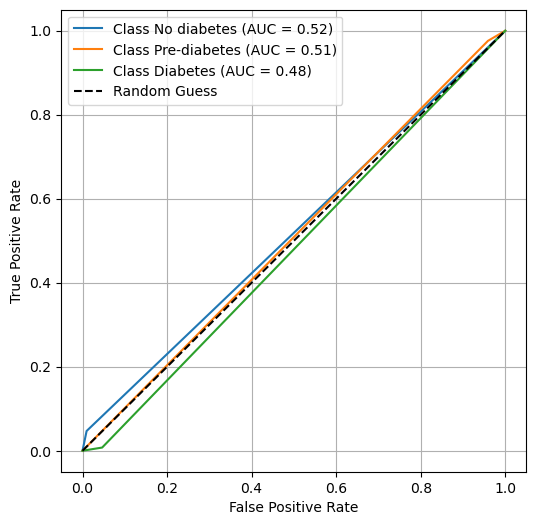

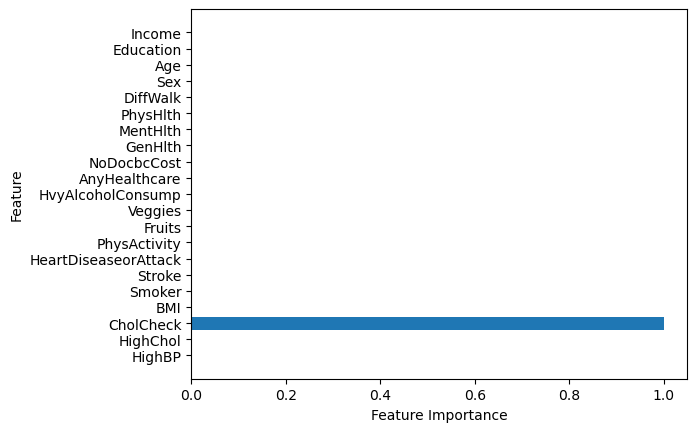

In [20]:
#Ada boost.
param_grid = {
        'n_estimators': [5, 10],
        'learning_rate': [0.01, 0.001],
    }
admodel = trainAdaBoost(train_x_up, train_y_up, val_x, val_y, param_grid)
ad_y_pred = admodel.predict(test_x)
evaluate_model(admodel, test_y, ad_y_pred, test_x)
boostingFI(admodel, features)

In [21]:
admodel

AdaBoostClassifier(learning_rate=0.01, n_estimators=5, random_state=42)

Fitting 8 folds for each of 4 candidates, totalling 32 fits
[CV 1/8; 1/4] START learning_rate=0.1, n_estimators=5...........................
[CV 1/8; 1/4] END learning_rate=0.1, n_estimators=5;, score=0.595 total time=   0.1s
[CV 2/8; 1/4] START learning_rate=0.1, n_estimators=5...........................
[CV 2/8; 1/4] END learning_rate=0.1, n_estimators=5;, score=0.595 total time=   0.1s
[CV 3/8; 1/4] START learning_rate=0.1, n_estimators=5...........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/8; 1/4] END learning_rate=0.1, n_estimators=5;, score=0.594 total time=   0.1s
[CV 4/8; 1/4] START learning_rate=0.1, n_estimators=5...........................
[CV 4/8; 1/4] END learning_rate=0.1, n_estimators=5;, score=0.594 total time=   0.1s
[CV 5/8; 1/4] START learning_rate=0.1, n_estimators=5...........................
[CV 5/8; 1/4] END learning_rate=0.1, n_estimators=5;, score=0.594 total time=   0.1s
[CV 6/8; 1/4] START learning_rate=0.1, n_estimators=5...........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 6/8; 1/4] END learning_rate=0.1, n_estimators=5;, score=0.594 total time=   0.1s
[CV 7/8; 1/4] START learning_rate=0.1, n_estimators=5...........................
[CV 7/8; 1/4] END learning_rate=0.1, n_estimators=5;, score=0.594 total time=   0.1s
[CV 8/8; 1/4] START learning_rate=0.1, n_estimators=5...........................
[CV 8/8; 1/4] END learning_rate=0.1, n_estimators=5;, score=0.595 total time=   0.1s
[CV 1/8; 2/4] START learning_rate=0.1, n_estimators=10..........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/8; 2/4] END learning_rate=0.1, n_estimators=10;, score=0.595 total time=   0.1s
[CV 2/8; 2/4] START learning_rate=0.1, n_estimators=10..........................
[CV 2/8; 2/4] END learning_rate=0.1, n_estimators=10;, score=0.595 total time=   0.1s
[CV 3/8; 2/4] START learning_rate=0.1, n_estimators=10..........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/8; 2/4] END learning_rate=0.1, n_estimators=10;, score=0.594 total time=   0.1s
[CV 4/8; 2/4] START learning_rate=0.1, n_estimators=10..........................
[CV 4/8; 2/4] END learning_rate=0.1, n_estimators=10;, score=0.594 total time=   0.1s
[CV 5/8; 2/4] START learning_rate=0.1, n_estimators=10..........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/8; 2/4] END learning_rate=0.1, n_estimators=10;, score=0.594 total time=   0.1s
[CV 6/8; 2/4] START learning_rate=0.1, n_estimators=10..........................
[CV 6/8; 2/4] END learning_rate=0.1, n_estimators=10;, score=0.594 total time=   0.1s
[CV 7/8; 2/4] START learning_rate=0.1, n_estimators=10..........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 7/8; 2/4] END learning_rate=0.1, n_estimators=10;, score=0.594 total time=   0.1s
[CV 8/8; 2/4] START learning_rate=0.1, n_estimators=10..........................
[CV 8/8; 2/4] END learning_rate=0.1, n_estimators=10;, score=0.595 total time=   0.1s
[CV 1/8; 3/4] START learning_rate=0.01, n_estimators=5..........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/8; 3/4] END learning_rate=0.01, n_estimators=5;, score=0.595 total time=   0.1s
[CV 2/8; 3/4] START learning_rate=0.01, n_estimators=5..........................
[CV 2/8; 3/4] END learning_rate=0.01, n_estimators=5;, score=0.595 total time=   0.1s
[CV 3/8; 3/4] START learning_rate=0.01, n_estimators=5..........................
[CV 3/8; 3/4] END learning_rate=0.01, n_estimators=5;, score=0.594 total time=   0.1s
[CV 4/8; 3/4] START learning_rate=0.01, n_estimators=5..........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/8; 3/4] END learning_rate=0.01, n_estimators=5;, score=0.594 total time=   0.1s
[CV 5/8; 3/4] START learning_rate=0.01, n_estimators=5..........................
[CV 5/8; 3/4] END learning_rate=0.01, n_estimators=5;, score=0.594 total time=   0.1s
[CV 6/8; 3/4] START learning_rate=0.01, n_estimators=5..........................
[CV 6/8; 3/4] END learning_rate=0.01, n_estimators=5;, score=0.594 total time=   0.1s
[CV 7/8; 3/4] START learning_rate=0.01, n_estimators=5..........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 7/8; 3/4] END learning_rate=0.01, n_estimators=5;, score=0.594 total time=   0.1s
[CV 8/8; 3/4] START learning_rate=0.01, n_estimators=5..........................
[CV 8/8; 3/4] END learning_rate=0.01, n_estimators=5;, score=0.595 total time=   0.1s
[CV 1/8; 4/4] START learning_rate=0.01, n_estimators=10.........................
[CV 1/8; 4/4] END learning_rate=0.01, n_estimators=10;, score=0.595 total time=   0.1s
[CV 2/8; 4/4] START learning_rate=0.01, n_estimators=10.........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/8; 4/4] END learning_rate=0.01, n_estimators=10;, score=0.595 total time=   0.1s
[CV 3/8; 4/4] START learning_rate=0.01, n_estimators=10.........................
[CV 3/8; 4/4] END learning_rate=0.01, n_estimators=10;, score=0.594 total time=   0.1s
[CV 4/8; 4/4] START learning_rate=0.01, n_estimators=10.........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/8; 4/4] END learning_rate=0.01, n_estimators=10;, score=0.594 total time=   0.1s
[CV 5/8; 4/4] START learning_rate=0.01, n_estimators=10.........................
[CV 5/8; 4/4] END learning_rate=0.01, n_estimators=10;, score=0.594 total time=   0.1s
[CV 6/8; 4/4] START learning_rate=0.01, n_estimators=10.........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 6/8; 4/4] END learning_rate=0.01, n_estimators=10;, score=0.594 total time=   0.1s
[CV 7/8; 4/4] START learning_rate=0.01, n_estimators=10.........................
[CV 7/8; 4/4] END learning_rate=0.01, n_estimators=10;, score=0.594 total time=   0.1s
[CV 8/8; 4/4] START learning_rate=0.01, n_estimators=10.........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 8/8; 4/4] END learning_rate=0.01, n_estimators=10;, score=0.595 total time=   0.1s
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      9516
         1.0       0.02      0.98      0.04       249
         2.0       0.03      0.01      0.01      1725

    accuracy                           0.02     11490
   macro avg       0.02      0.33      0.02     11490
weighted avg       0.00      0.02      0.00     11490

Accuracy of model  AdaBoostClassifier :  0.0223
Recall of model for the No diabetes class AdaBoostClassifier :  0.0
Recall of model for the Pre-diabetes class AdaBoostClassifier :  0.9759
Recall of model for the Diabetes class AdaBoostClassifier :  0.0075


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/metrics/_cl

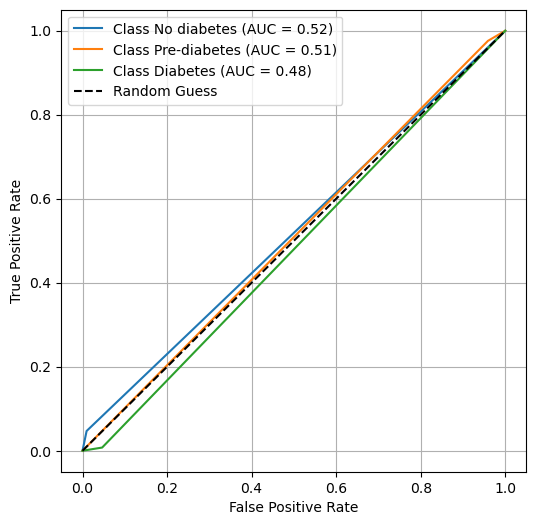

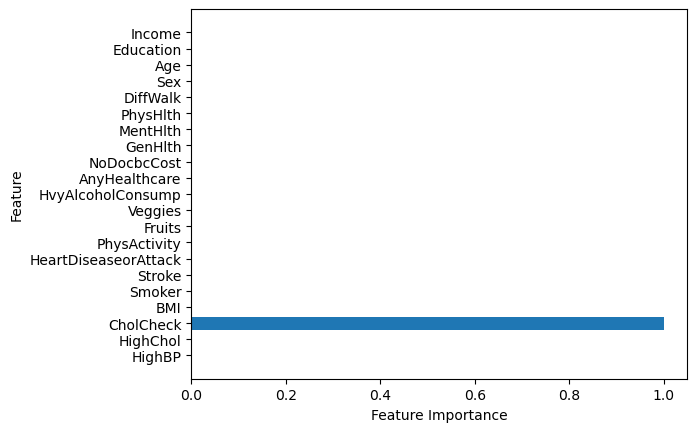

In [23]:
# Ada boost.
param_grid = {
        'n_estimators': [5, 10],
        'learning_rate': [0.1, 0.01],
    }
admodel = trainAdaBoost(train_x_down, train_y_down, val_x, val_y, param_grid)
ad_y_pred = admodel.predict(test_x)
evaluate_model(admodel, test_y, ad_y_pred, test_x)
boostingFI(admodel, features)

In [24]:
admodel

AdaBoostClassifier(learning_rate=0.1, n_estimators=5, random_state=42)

Fitting 8 folds for each of 2 candidates, totalling 16 fits
[CV 1/8; 1/2] START learning_rate=0.1, n_estimators=200.........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/8; 1/2] END learning_rate=0.1, n_estimators=200;, score=0.580 total time= 2.4min
[CV 2/8; 1/2] START learning_rate=0.1, n_estimators=200.........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/8; 1/2] END learning_rate=0.1, n_estimators=200;, score=0.608 total time= 2.3min
[CV 3/8; 1/2] START learning_rate=0.1, n_estimators=200.........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/8; 1/2] END learning_rate=0.1, n_estimators=200;, score=0.604 total time= 2.2min
[CV 4/8; 1/2] START learning_rate=0.1, n_estimators=200.........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/8; 1/2] END learning_rate=0.1, n_estimators=200;, score=0.604 total time= 2.2min
[CV 5/8; 1/2] START learning_rate=0.1, n_estimators=200.........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/8; 1/2] END learning_rate=0.1, n_estimators=200;, score=0.606 total time= 2.2min
[CV 6/8; 1/2] START learning_rate=0.1, n_estimators=200.........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 6/8; 1/2] END learning_rate=0.1, n_estimators=200;, score=0.603 total time= 2.1min
[CV 7/8; 1/2] START learning_rate=0.1, n_estimators=200.........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 7/8; 1/2] END learning_rate=0.1, n_estimators=200;, score=0.602 total time= 2.1min
[CV 8/8; 1/2] START learning_rate=0.1, n_estimators=200.........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 8/8; 1/2] END learning_rate=0.1, n_estimators=200;, score=0.600 total time= 2.1min
[CV 1/8; 2/2] START learning_rate=0.1, n_estimators=500.........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/8; 2/2] END learning_rate=0.1, n_estimators=500;, score=0.605 total time= 5.5min
[CV 2/8; 2/2] START learning_rate=0.1, n_estimators=500.........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/8; 2/2] END learning_rate=0.1, n_estimators=500;, score=0.640 total time= 5.4min
[CV 3/8; 2/2] START learning_rate=0.1, n_estimators=500.........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/8; 2/2] END learning_rate=0.1, n_estimators=500;, score=0.632 total time= 5.2min
[CV 4/8; 2/2] START learning_rate=0.1, n_estimators=500.........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/8; 2/2] END learning_rate=0.1, n_estimators=500;, score=0.631 total time= 5.2min
[CV 5/8; 2/2] START learning_rate=0.1, n_estimators=500.........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/8; 2/2] END learning_rate=0.1, n_estimators=500;, score=0.634 total time= 5.7min
[CV 6/8; 2/2] START learning_rate=0.1, n_estimators=500.........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 6/8; 2/2] END learning_rate=0.1, n_estimators=500;, score=0.633 total time= 6.0min
[CV 7/8; 2/2] START learning_rate=0.1, n_estimators=500.........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 7/8; 2/2] END learning_rate=0.1, n_estimators=500;, score=0.630 total time= 6.1min
[CV 8/8; 2/2] START learning_rate=0.1, n_estimators=500.........................


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 8/8; 2/2] END learning_rate=0.1, n_estimators=500;, score=0.631 total time= 6.5min


/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/blue/kgraim/geesa.daluwatumu/conda/envs/mle/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.92      0.74      0.82      9516
         1.0       0.02      0.04      0.03       249
         2.0       0.34      0.67      0.45      1725

    accuracy                           0.71     11490
   macro avg       0.43      0.48      0.43     11490
weighted avg       0.81      0.71      0.75     11490

Accuracy of model  AdaBoostClassifier :  0.7139
Recall of model for the No diabetes class AdaBoostClassifier :  0.74
Recall of model for the Pre-diabetes class AdaBoostClassifier :  0.0402
Recall of model for the Diabetes class AdaBoostClassifier :  0.6672


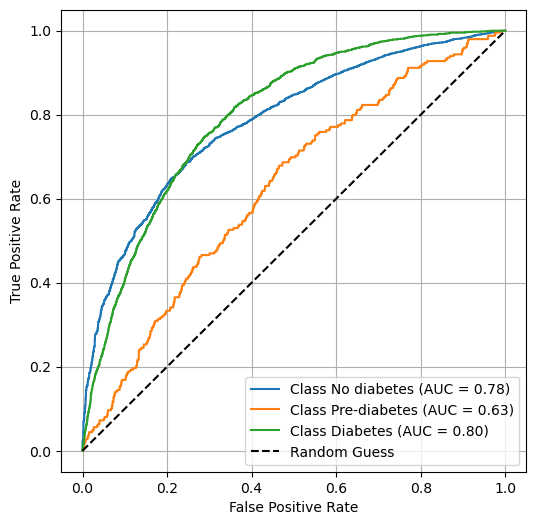

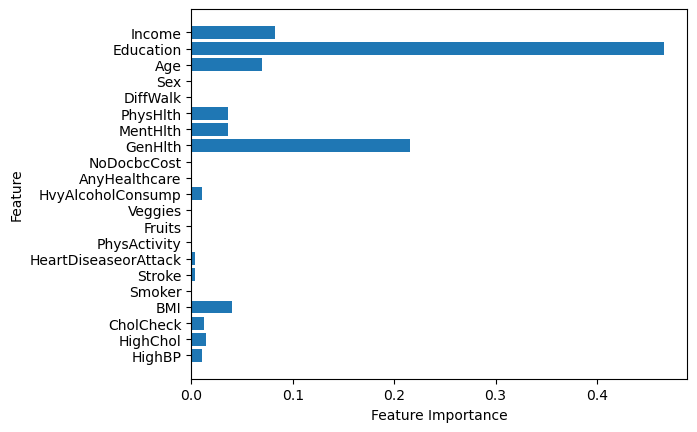

In [25]:
# Ada boost.
param_grid = {
        'n_estimators': [200, 500],
        'learning_rate': [0.1],
    }
admodel = trainAdaBoost(train_x_smote, train_y_smote, val_x, val_y, param_grid)
ad_y_pred = admodel.predict(test_x)
evaluate_model(admodel, test_y, ad_y_pred, test_x)
boostingFI(admodel, features)

In [26]:
admodel

AdaBoostClassifier(learning_rate=0.1, n_estimators=500, random_state=42)

Fitting 8 folds for each of 1 candidates, totalling 8 fits
[CV 1/8; 1/1] START n_estimators=100............................................
[CV 1/8; 1/1] END .............n_estimators=100;, score=0.382 total time= 2.9min
[CV 2/8; 1/1] START n_estimators=100............................................
[CV 2/8; 1/1] END .............n_estimators=100;, score=0.381 total time= 2.9min
[CV 3/8; 1/1] START n_estimators=100............................................
[CV 3/8; 1/1] END .............n_estimators=100;, score=0.384 total time= 2.9min
[CV 4/8; 1/1] START n_estimators=100............................................
[CV 4/8; 1/1] END .............n_estimators=100;, score=0.385 total time= 2.8min
[CV 5/8; 1/1] START n_estimators=100............................................
[CV 5/8; 1/1] END .............n_estimators=100;, score=0.385 total time= 2.8min
[CV 6/8; 1/1] START n_estimators=100............................................
[CV 6/8; 1/1] END .............n_estimators=100;, 

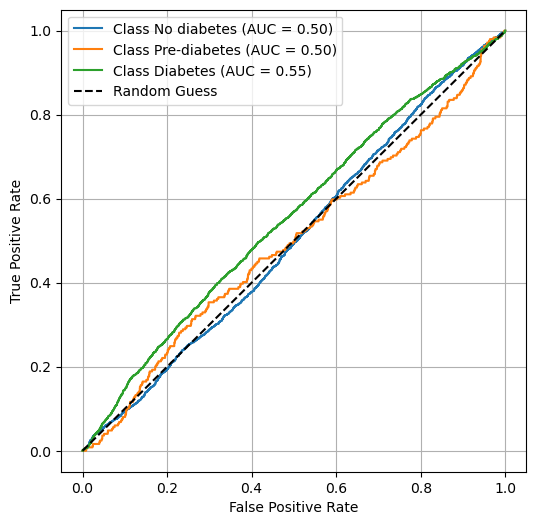

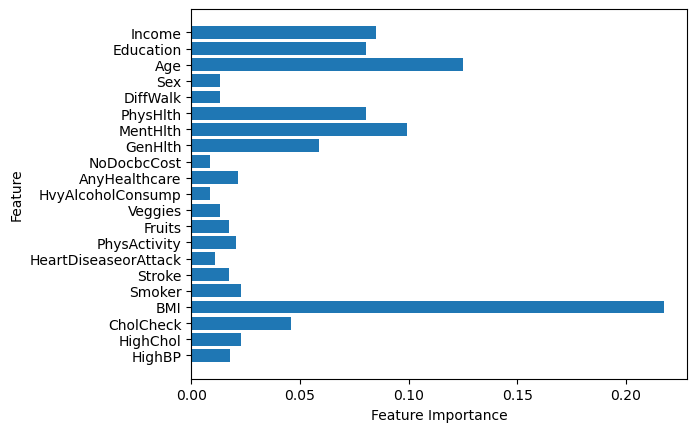

In [27]:
# Gradient boosting.
param_grid = {
        'n_estimators': [100],
        #'learning_rate': [0.1, 0.01, 0.001],
    }
gbmodel = trainGradientBoost(train_x_up, train_y_up, val_x, val_y, param_grid)
gb_y_pred = gbmodel.predict(test_x)
evaluate_model(gbmodel, test_y, gb_y_pred, test_x)
boostingFI(gbmodel, features)

In [28]:
gbmodel

GradientBoostingClassifier(random_state=42)

Fitting 8 folds for each of 9 candidates, totalling 72 fits
[CV 1/8; 1/9] START learning_rate=0.1, n_estimators=5...........................
[CV 1/8; 1/9] END learning_rate=0.1, n_estimators=5;, score=0.595 total time=   1.1s
[CV 2/8; 1/9] START learning_rate=0.1, n_estimators=5...........................
[CV 2/8; 1/9] END learning_rate=0.1, n_estimators=5;, score=0.595 total time=   0.4s
[CV 3/8; 1/9] START learning_rate=0.1, n_estimators=5...........................
[CV 3/8; 1/9] END learning_rate=0.1, n_estimators=5;, score=0.594 total time=   0.3s
[CV 4/8; 1/9] START learning_rate=0.1, n_estimators=5...........................
[CV 4/8; 1/9] END learning_rate=0.1, n_estimators=5;, score=0.594 total time=   0.3s
[CV 5/8; 1/9] START learning_rate=0.1, n_estimators=5...........................
[CV 5/8; 1/9] END learning_rate=0.1, n_estimators=5;, score=0.594 total time=   0.3s
[CV 6/8; 1/9] START learning_rate=0.1, n_estimators=5...........................
[CV 6/8; 1/9] END learning_ra

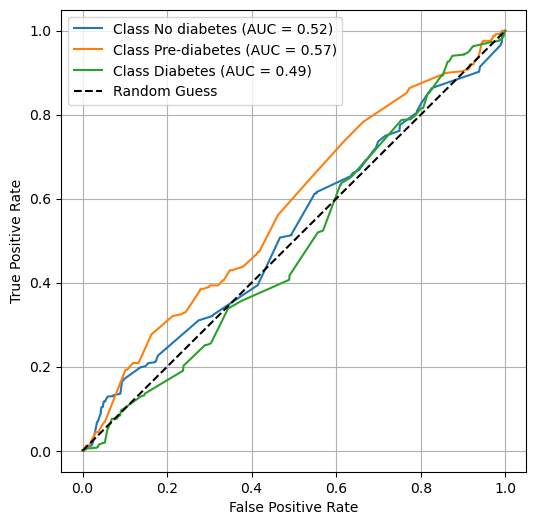

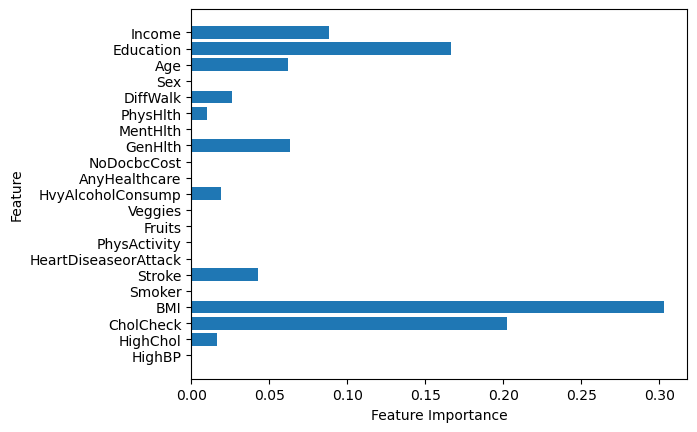

In [29]:
# Gradient boosting.
param_grid = {
    'n_estimators': [5, 10, 15],
    'learning_rate': [0.1, 0.01, 0.001],
}
gbmodel = trainGradientBoost(train_x_down, train_y_down, val_x, val_y, param_grid)
gb_y_pred = gbmodel.predict(test_x)
evaluate_model(gbmodel, test_y, gb_y_pred, test_x)
boostingFI(gbmodel, features)

In [30]:
gbmodel

GradientBoostingClassifier(learning_rate=0.01, n_estimators=5, random_state=42)

Fitting 8 folds for each of 9 candidates, totalling 72 fits
[CV 1/8; 1/9] START learning_rate=0.1, n_estimators=5...........................
[CV 1/8; 1/9] END learning_rate=0.1, n_estimators=5;, score=0.544 total time=  32.7s
[CV 2/8; 1/9] START learning_rate=0.1, n_estimators=5...........................
[CV 2/8; 1/9] END learning_rate=0.1, n_estimators=5;, score=0.571 total time=  34.6s
[CV 3/8; 1/9] START learning_rate=0.1, n_estimators=5...........................
[CV 3/8; 1/9] END learning_rate=0.1, n_estimators=5;, score=0.577 total time=  30.8s
[CV 4/8; 1/9] START learning_rate=0.1, n_estimators=5...........................
[CV 4/8; 1/9] END learning_rate=0.1, n_estimators=5;, score=0.574 total time=  28.7s
[CV 5/8; 1/9] START learning_rate=0.1, n_estimators=5...........................
[CV 5/8; 1/9] END learning_rate=0.1, n_estimators=5;, score=0.576 total time=  29.6s
[CV 6/8; 1/9] START learning_rate=0.1, n_estimators=5...........................
[CV 6/8; 1/9] END learning_ra

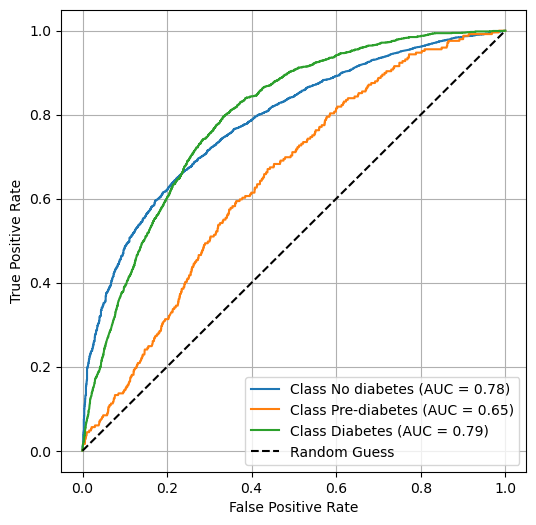

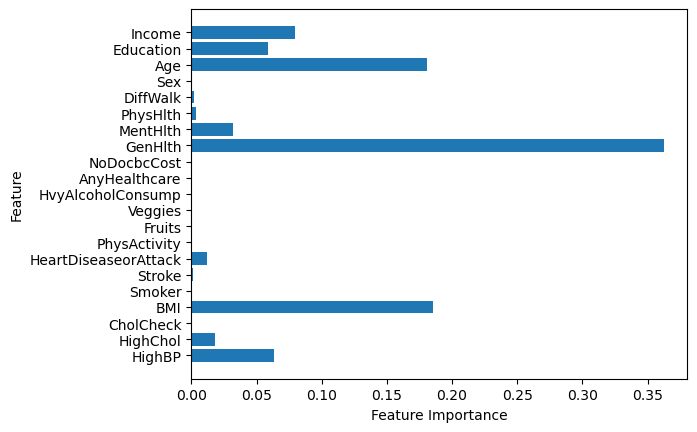

In [31]:
# Gradient boosting.
param_grid = {
    'n_estimators': [5, 10, 15],
    'learning_rate': [0.1, 0.01, 0.001],
}
gbmodel = trainGradientBoost(train_x_smote, train_y_smote, val_x, val_y, param_grid)
gb_y_pred = gbmodel.predict(test_x)
evaluate_model(gbmodel, test_y, gb_y_pred, test_x)
boostingFI(gbmodel, features)

In [32]:
gbmodel

GradientBoostingClassifier(n_estimators=15, random_state=42)

Fitting 8 folds for each of 8 candidates, totalling 64 fits
[CV 1/8; 1/8] START learning_rate=0.1, max_depth=20, n_estimators=5.............
[CV 1/8; 1/8] END learning_rate=0.1, max_depth=20, n_estimators=5;, score=0.800 total time=   3.7s
[CV 2/8; 1/8] START learning_rate=0.1, max_depth=20, n_estimators=5.............
[CV 2/8; 1/8] END learning_rate=0.1, max_depth=20, n_estimators=5;, score=0.811 total time=   1.4s
[CV 3/8; 1/8] START learning_rate=0.1, max_depth=20, n_estimators=5.............
[CV 3/8; 1/8] END learning_rate=0.1, max_depth=20, n_estimators=5;, score=0.799 total time=   1.3s
[CV 4/8; 1/8] START learning_rate=0.1, max_depth=20, n_estimators=5.............
[CV 4/8; 1/8] END learning_rate=0.1, max_depth=20, n_estimators=5;, score=0.819 total time=   1.4s
[CV 5/8; 1/8] START learning_rate=0.1, max_depth=20, n_estimators=5.............
[CV 5/8; 1/8] END learning_rate=0.1, max_depth=20, n_estimators=5;, score=0.821 total time=   1.3s
[CV 6/8; 1/8] START learning_rate=0.1, m

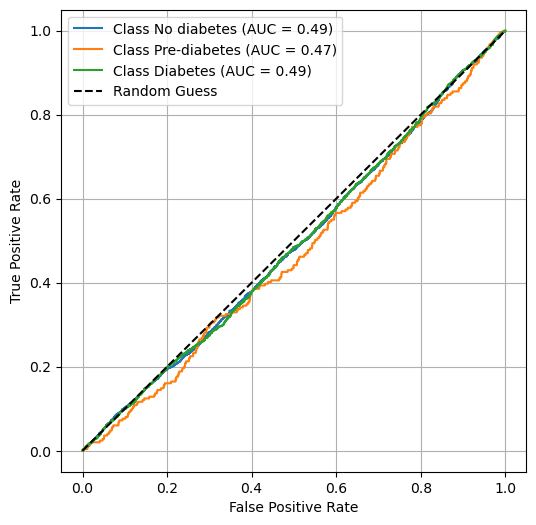

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

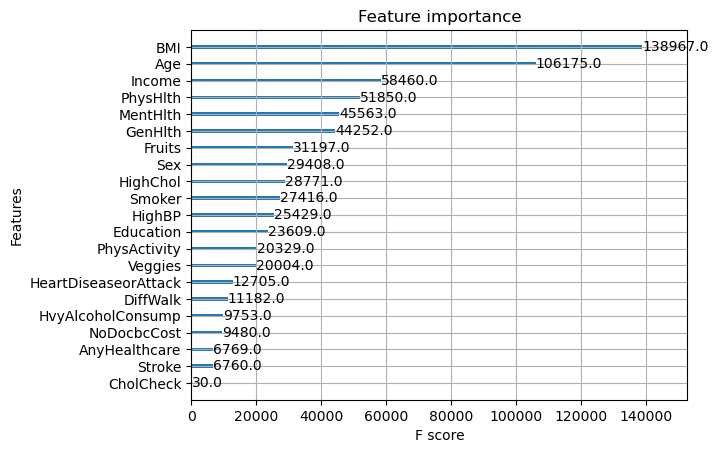

In [33]:
# XGBoost.
param_grid = {
    'n_estimators': [5, 10],
    'max_depth': [20, 50],
    'learning_rate': [0.1, 0.01],
}
xgbmodel = trainXGB(train_x_up, train_y_up, val_x, val_y, param_grid)
xgb_y_pred = xgbmodel.predict(test_x)
evaluate_model(xgbmodel, test_y, xgb_y_pred, test_x)
xgbmodel.get_booster().feature_names = features
plot_importance(xgbmodel)

In [34]:
xgbmodel

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=50, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Fitting 8 folds for each of 12 candidates, totalling 96 fits
[CV 1/8; 1/12] START learning_rate=0.1, max_depth=10, n_estimators=5............
[CV 1/8; 1/12] END learning_rate=0.1, max_depth=10, n_estimators=5;, score=0.551 total time=   0.2s
[CV 2/8; 1/12] START learning_rate=0.1, max_depth=10, n_estimators=5............
[CV 2/8; 1/12] END learning_rate=0.1, max_depth=10, n_estimators=5;, score=0.554 total time=   0.1s
[CV 3/8; 1/12] START learning_rate=0.1, max_depth=10, n_estimators=5............
[CV 3/8; 1/12] END learning_rate=0.1, max_depth=10, n_estimators=5;, score=0.561 total time=   0.1s
[CV 4/8; 1/12] START learning_rate=0.1, max_depth=10, n_estimators=5............
[CV 4/8; 1/12] END learning_rate=0.1, max_depth=10, n_estimators=5;, score=0.573 total time=   0.1s
[CV 5/8; 1/12] START learning_rate=0.1, max_depth=10, n_estimators=5............
[CV 5/8; 1/12] END learning_rate=0.1, max_depth=10, n_estimators=5;, score=0.571 total time=   0.1s
[CV 6/8; 1/12] START learning_rate

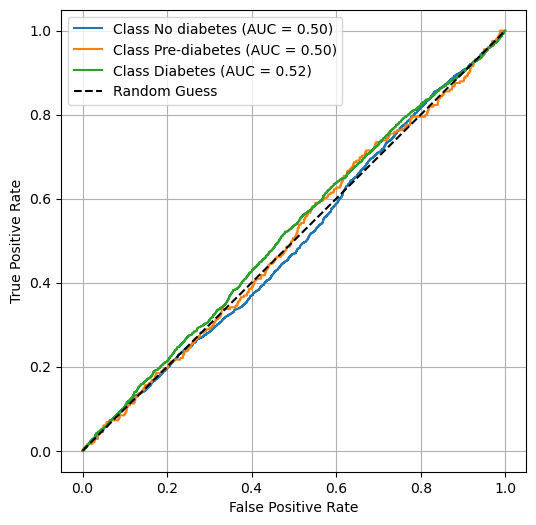

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

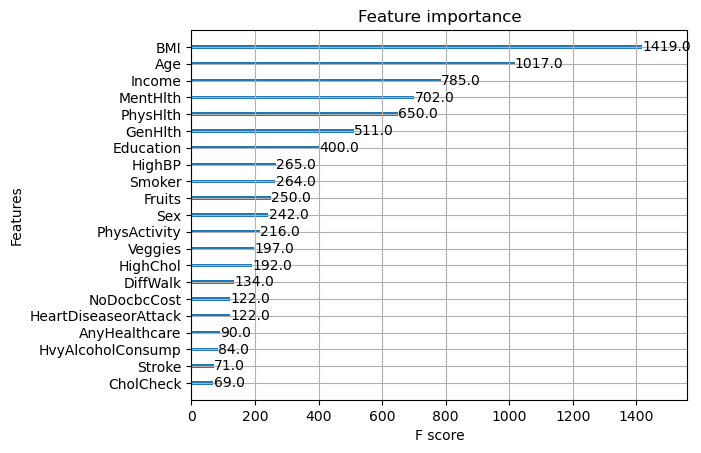

In [22]:
# XGBoost.
param_grid = {
    # 'max_depth': [3, 4, 5],
    # 'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [5, 10],
    'max_depth': [10, 20],
    'learning_rate': [0.1, 0.01, 0.001],
}
xgbmodel = trainXGB(train_x_down, train_y_down, val_x, val_y, param_grid)
xgb_y_pred = xgbmodel.predict(test_x)
evaluate_model(xgbmodel, test_y, xgb_y_pred, test_x)
xgbmodel.get_booster().feature_names = features
plot_importance(xgbmodel)

In [36]:
xgbmodel

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Fitting 8 folds for each of 1 candidates, totalling 8 fits
[CV 1/8; 1/1] START learning_rate=0.1, max_depth=100, n_estimators=500..........
[CV 1/8; 1/1] END learning_rate=0.1, max_depth=100, n_estimators=500;, score=0.808 total time=  52.9s
[CV 2/8; 1/1] START learning_rate=0.1, max_depth=100, n_estimators=500..........
[CV 2/8; 1/1] END learning_rate=0.1, max_depth=100, n_estimators=500;, score=0.811 total time=  53.2s
[CV 3/8; 1/1] START learning_rate=0.1, max_depth=100, n_estimators=500..........
[CV 3/8; 1/1] END learning_rate=0.1, max_depth=100, n_estimators=500;, score=0.808 total time= 1.4min
[CV 4/8; 1/1] START learning_rate=0.1, max_depth=100, n_estimators=500..........
[CV 4/8; 1/1] END learning_rate=0.1, max_depth=100, n_estimators=500;, score=0.809 total time=  53.2s
[CV 5/8; 1/1] START learning_rate=0.1, max_depth=100, n_estimators=500..........
[CV 5/8; 1/1] END learning_rate=0.1, max_depth=100, n_estimators=500;, score=0.810 total time=  53.5s
[CV 6/8; 1/1] START learni

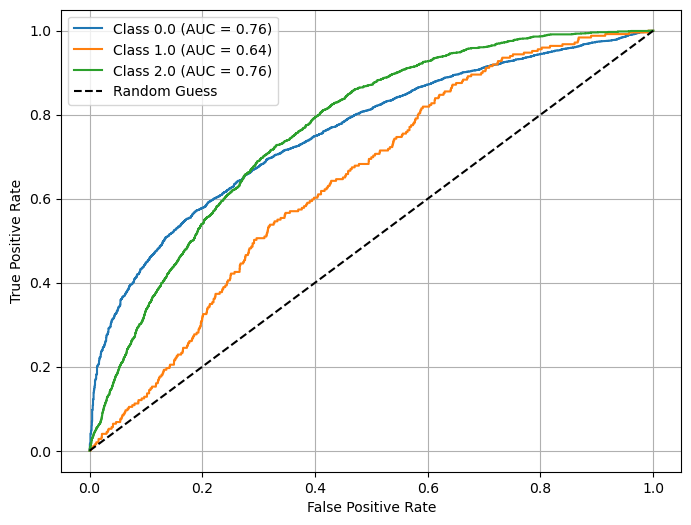

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

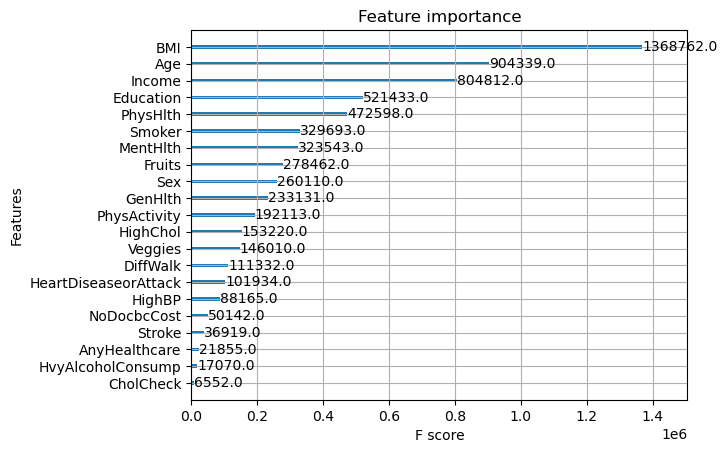

In [25]:
# XGBoost.
param_grid = {
    'n_estimators': [500],
    'max_depth': [100],
    'learning_rate': [0.1],
}
xgbmodel = trainXGB(train_x_smote, train_y_smote, val_x, val_y, param_grid, cv=5)
xgb_y_pred = xgbmodel.predict(test_x)
evaluate_model(xgbmodel, test_y, xgb_y_pred, test_x)
xgbmodel.get_booster().feature_names = features
plot_importance(xgbmodel)

In [26]:
xgbmodel

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=100, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

## Bagging

In [21]:
# Bagging.
def trainBaggingClassifier(base_classifier, param_grid, train_x, train_y, val_x, val_y, cv=8):
    bagging_model = BaggingClassifier(estimator=base_classifier, random_state=seed)
    x = np.concatenate((train_x, val_x), axis=0)
    y = np.concatenate((train_y, val_y), axis=0)
    model = hyperparameter_tuning(bagging_model, param_grid, x, y, cv)
    model.fit(train_x, train_y)
    return model

def baggingFI(model, feature_names):
    model_feature_importances = np.mean([
        tree.feature_importances_ for tree in model.estimators_
    ], axis=0)
    # Plot feature importances.
    plt.barh(feature_names, model_feature_importances)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.show()

Fitting 8 folds for each of 4 candidates, totalling 32 fits
[CV 1/8; 1/4] START estimator__max_depth=2, max_samples=0.1.....................
[CV 1/8; 1/4] END estimator__max_depth=2, max_samples=0.1;, score=0.349 total time=   1.3s
[CV 2/8; 1/4] START estimator__max_depth=2, max_samples=0.1.....................
[CV 2/8; 1/4] END estimator__max_depth=2, max_samples=0.1;, score=0.353 total time=   1.0s
[CV 3/8; 1/4] START estimator__max_depth=2, max_samples=0.1.....................
[CV 3/8; 1/4] END estimator__max_depth=2, max_samples=0.1;, score=0.349 total time=   1.0s
[CV 4/8; 1/4] START estimator__max_depth=2, max_samples=0.1.....................
[CV 4/8; 1/4] END estimator__max_depth=2, max_samples=0.1;, score=0.352 total time=   1.0s
[CV 5/8; 1/4] START estimator__max_depth=2, max_samples=0.1.....................
[CV 5/8; 1/4] END estimator__max_depth=2, max_samples=0.1;, score=0.351 total time=   1.0s
[CV 6/8; 1/4] START estimator__max_depth=2, max_samples=0.1.....................

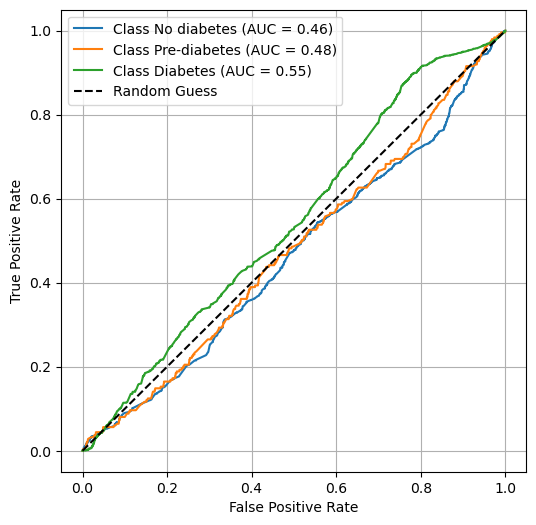

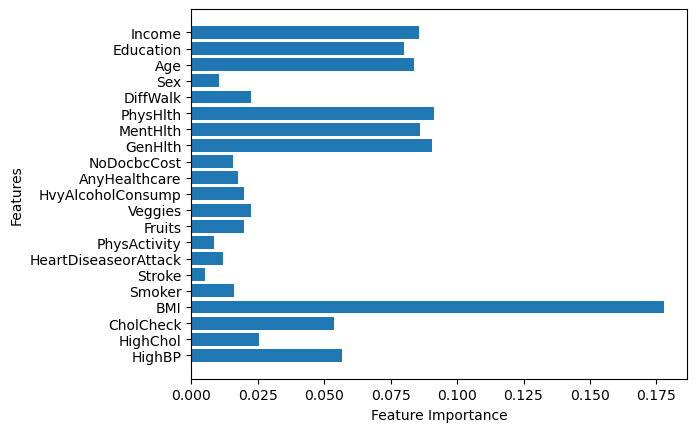

In [40]:
# Bagged decision trees.
param_grid = {
    'estimator__max_depth': [2, 5],
    'max_samples': [0.1, 0.5]
}
baggingDTmodel = trainBaggingClassifier(DecisionTreeClassifier(random_state=seed),param_grid , train_x_up, train_y_up, val_x, val_y)
# Evaluate baggingDTmodel.
baggingDT_y_pred = baggingDTmodel.predict(test_x)
evaluate_model(baggingDTmodel, test_y, baggingDT_y_pred, test_x)
baggingFI(baggingDTmodel, features)

In [41]:
baggingDTmodel

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                   random_state=42),
                  max_samples=0.1, random_state=42)

Fitting 8 folds for each of 4 candidates, totalling 32 fits
[CV 1/8; 1/4] START estimator__max_depth=2, max_samples=0.1.....................
[CV 1/8; 1/4] END estimator__max_depth=2, max_samples=0.1;, score=0.590 total time=   0.1s
[CV 2/8; 1/4] START estimator__max_depth=2, max_samples=0.1.....................
[CV 2/8; 1/4] END estimator__max_depth=2, max_samples=0.1;, score=0.593 total time=   0.1s
[CV 3/8; 1/4] START estimator__max_depth=2, max_samples=0.1.....................
[CV 3/8; 1/4] END estimator__max_depth=2, max_samples=0.1;, score=0.594 total time=   0.1s
[CV 4/8; 1/4] START estimator__max_depth=2, max_samples=0.1.....................
[CV 4/8; 1/4] END estimator__max_depth=2, max_samples=0.1;, score=0.594 total time=   0.1s
[CV 5/8; 1/4] START estimator__max_depth=2, max_samples=0.1.....................
[CV 5/8; 1/4] END estimator__max_depth=2, max_samples=0.1;, score=0.594 total time=   0.1s
[CV 6/8; 1/4] START estimator__max_depth=2, max_samples=0.1.....................

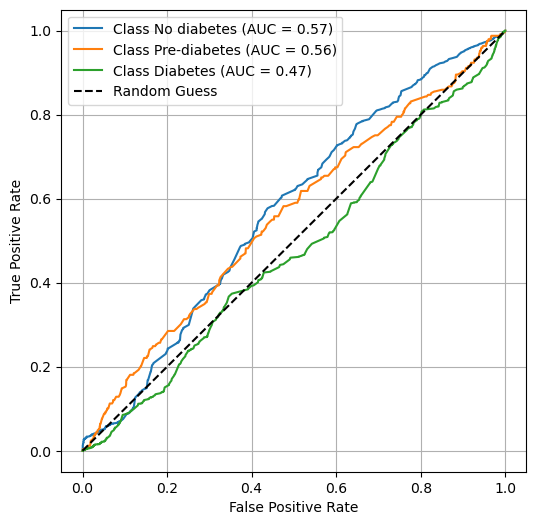

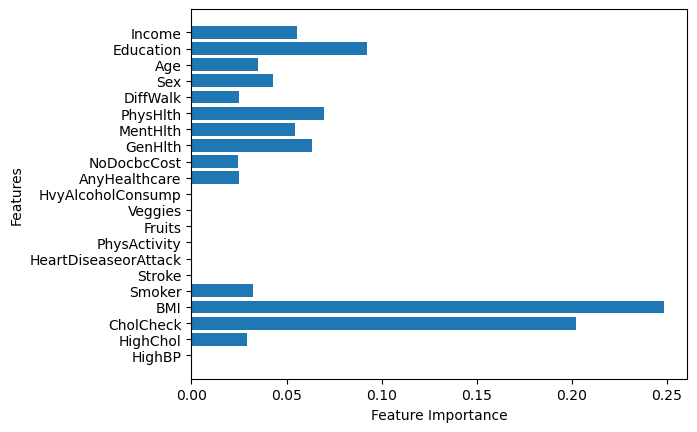

In [42]:
# Bagged decision trees.
param_grid = {
    'estimator__max_depth': [2, 5],
    'max_samples': [0.1, 0.5]
}
baggingDTmodel = trainBaggingClassifier(DecisionTreeClassifier(random_state=seed),param_grid , train_x_down, train_y_down, val_x, val_y)
# Evaluate baggingDTmodel.
baggingDT_y_pred = baggingDTmodel.predict(test_x)
evaluate_model(baggingDTmodel, test_y, baggingDT_y_pred, test_x)
baggingFI(baggingDTmodel, features)

In [43]:
baggingDTmodel

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                   random_state=42),
                  max_samples=0.5, random_state=42)

Fitting 8 folds for each of 4 candidates, totalling 32 fits
[CV 1/8; 1/4] START estimator__max_depth=2, max_samples=0.1.....................
[CV 1/8; 1/4] END estimator__max_depth=2, max_samples=0.1;, score=0.496 total time=   1.9s
[CV 2/8; 1/4] START estimator__max_depth=2, max_samples=0.1.....................
[CV 2/8; 1/4] END estimator__max_depth=2, max_samples=0.1;, score=0.504 total time=   1.3s
[CV 3/8; 1/4] START estimator__max_depth=2, max_samples=0.1.....................
[CV 3/8; 1/4] END estimator__max_depth=2, max_samples=0.1;, score=0.502 total time=   1.3s
[CV 4/8; 1/4] START estimator__max_depth=2, max_samples=0.1.....................
[CV 4/8; 1/4] END estimator__max_depth=2, max_samples=0.1;, score=0.500 total time=   1.3s
[CV 5/8; 1/4] START estimator__max_depth=2, max_samples=0.1.....................
[CV 5/8; 1/4] END estimator__max_depth=2, max_samples=0.1;, score=0.498 total time=   1.3s
[CV 6/8; 1/4] START estimator__max_depth=2, max_samples=0.1.....................

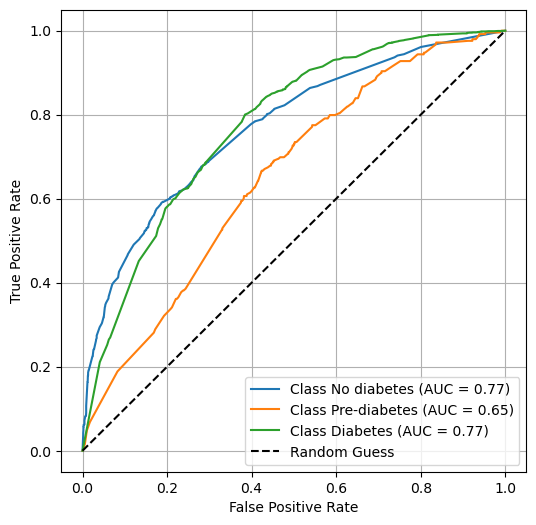

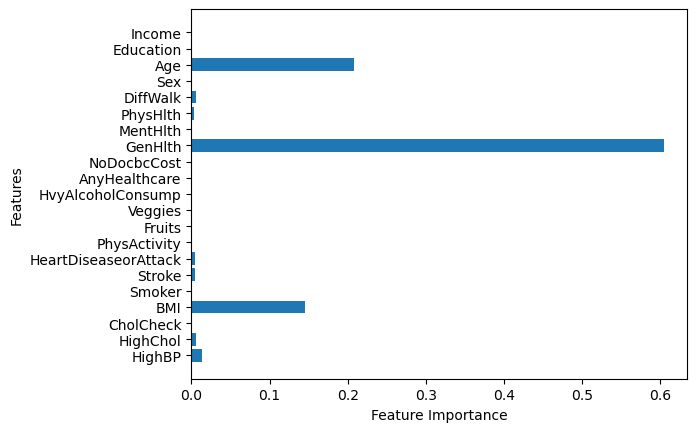

In [44]:
# Bagged decision trees.
param_grid = {
    'estimator__max_depth': [2, 5],
    'max_samples': [0.1, 0.5],
}
baggingDTmodel = trainBaggingClassifier(DecisionTreeClassifier(random_state=seed),param_grid , train_x_smote, train_y_smote, val_x, val_y)
# Evaluate baggingDTmodel.
baggingDT_y_pred = baggingDTmodel.predict(test_x)
evaluate_model(baggingDTmodel, test_y, baggingDT_y_pred, test_x)
baggingFI(baggingDTmodel, features)

In [45]:
baggingDTmodel

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                   random_state=42),
                  max_samples=0.1, random_state=42)

Fitting 8 folds for each of 1 candidates, totalling 8 fits
[CV 1/8; 1/1] START n_estimators=3..............................................
[CV 1/8; 1/1] END ...............n_estimators=3;, score=0.957 total time=10.6min
[CV 2/8; 1/1] START n_estimators=3..............................................
[CV 2/8; 1/1] END ...............n_estimators=3;, score=0.957 total time= 5.6min
[CV 3/8; 1/1] START n_estimators=3..............................................
[CV 3/8; 1/1] END ...............n_estimators=3;, score=0.954 total time= 4.3min
[CV 4/8; 1/1] START n_estimators=3..............................................
[CV 4/8; 1/1] END ...............n_estimators=3;, score=0.958 total time= 4.7min
[CV 5/8; 1/1] START n_estimators=3..............................................
[CV 5/8; 1/1] END ...............n_estimators=3;, score=0.957 total time= 3.5min
[CV 6/8; 1/1] START n_estimators=3..............................................
[CV 6/8; 1/1] END ...............n_estimators=3;, 

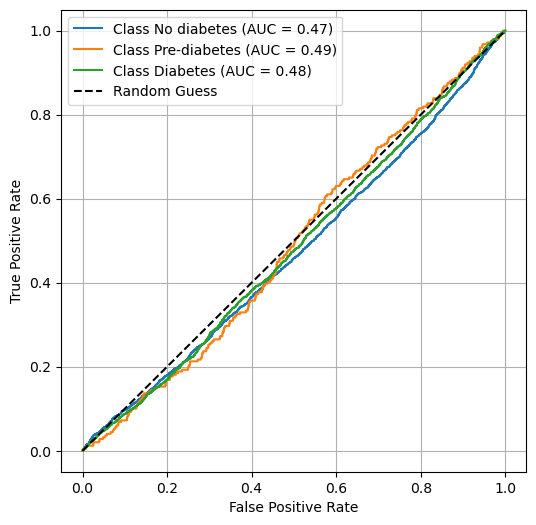

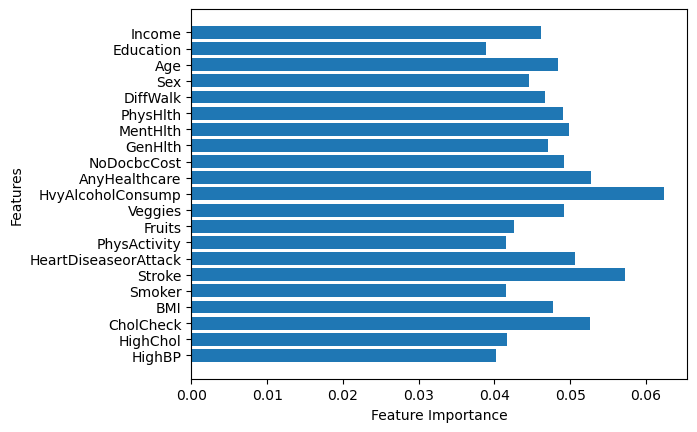

In [22]:
# Bagged XGB.
param_grid = {
    'n_estimators': [3],
    #'max_depth': [20],
    #'learning_rate': [0.1],
             }
baggingXGBmodel = trainBaggingClassifier(xgb.XGBClassifier(random_state=seed, learning_rate=0.1, max_depth=20), param_grid , train_x_up, train_y_up, val_x, val_y)
# # Evaluate bagging model.
baggingXGB_y_pred = baggingXGBmodel.predict(test_x)
evaluate_model(baggingXGBmodel, test_y, baggingXGB_y_pred, test_x)
baggingFI(baggingXGBmodel, features)

In [23]:
baggingXGBmodel

BaggingClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.1, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=20,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                  n_estimators=3, random_state=42)

Fitting 8 folds for each of 1 candidates, totalling 8 fits
[CV 1/8; 1/1] START n_estimators=3..............................................
[CV 1/8; 1/1] END ...............n_estimators=3;, score=0.537 total time= 1.1min
[CV 2/8; 1/1] START n_estimators=3..............................................
[CV 2/8; 1/1] END ...............n_estimators=3;, score=0.535 total time=  56.2s
[CV 3/8; 1/1] START n_estimators=3..............................................
[CV 3/8; 1/1] END ...............n_estimators=3;, score=0.557 total time= 1.2min
[CV 4/8; 1/1] START n_estimators=3..............................................
[CV 4/8; 1/1] END ...............n_estimators=3;, score=0.566 total time= 1.1min
[CV 5/8; 1/1] START n_estimators=3..............................................
[CV 5/8; 1/1] END ...............n_estimators=3;, score=0.555 total time= 1.0min
[CV 6/8; 1/1] START n_estimators=3..............................................
[CV 6/8; 1/1] END ...............n_estimators=3;, 

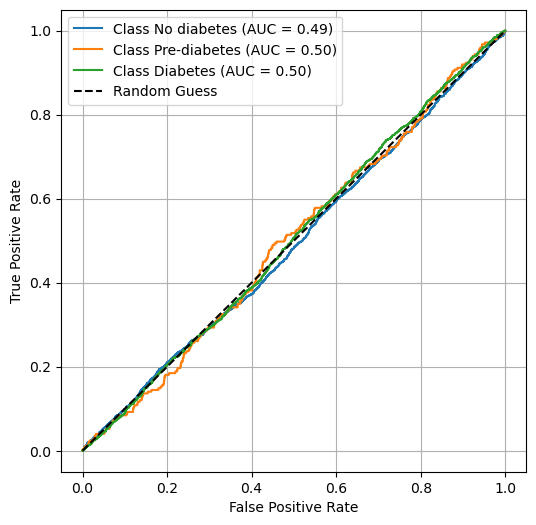

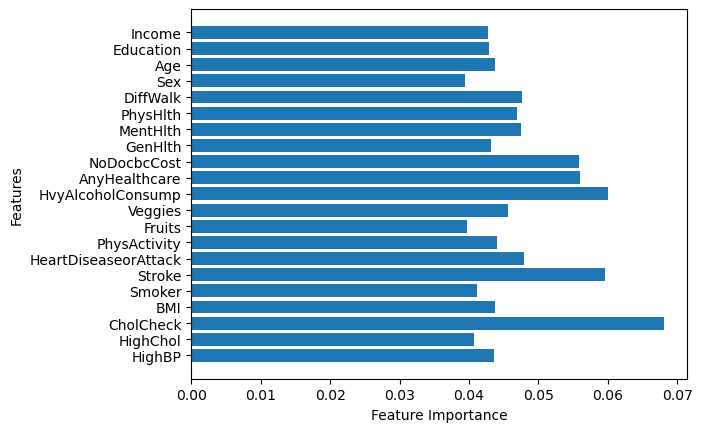

In [24]:
# Bagged XGB.
param_grid ={ 
    'n_estimators': [3],
   # 'max_depth': [20],
   # 'learning_rate': [0.1],
}
baggingXGBmodel = trainBaggingClassifier(xgb.XGBClassifier(random_state=seed,learning_rate=0.1, max_depth=20),param_grid , train_x_down, train_y_down, val_x, val_y)
# # Evaluate bagging model.
baggingXGB_y_pred = baggingXGBmodel.predict(test_x)
evaluate_model(baggingXGBmodel, test_y, baggingXGB_y_pred, test_x)
baggingFI(baggingXGBmodel, features)

In [25]:
baggingXGBmodel

BaggingClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.1, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=20,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                  n_estimators=3, random_state=42)

In [ ]:
# Bagged XGB.
param_grid ={
    'n_estimators': [3],
    #'max_depth': [20],
    #'learning_rate': [0.1],
}
baggingXGBmodel = trainBaggingClassifier(xgb.XGBClassifier(random_state=seed,learning_rate=0.1, max_depth=20),param_grid , train_x_smote, train_y_smote, val_x, val_y)
# # Evaluate bagging model.
baggingXGB_y_pred = baggingXGBmodel.predict(test_x)
evaluate_model(baggingXGBmodel, test_y, baggingXGB_y_pred, test_x)
baggingFI(baggingXGBmodel, features)

Fitting 8 folds for each of 1 candidates, totalling 8 fits
[CV 1/8; 1/1] START n_estimators=3..............................................
[CV 1/8; 1/1] END ...............n_estimators=3;, score=0.660 total time=16.8min
[CV 2/8; 1/1] START n_estimators=3..............................................
[CV 2/8; 1/1] END ...............n_estimators=3;, score=0.866 total time=16.6min
[CV 3/8; 1/1] START n_estimators=3..............................................
[CV 3/8; 1/1] END ...............n_estimators=3;, score=0.952 total time=17.1min
[CV 4/8; 1/1] START n_estimators=3..............................................
[CV 4/8; 1/1] END ...............n_estimators=3;, score=0.953 total time=16.8min
[CV 5/8; 1/1] START n_estimators=3..............................................
[CV 5/8; 1/1] END ...............n_estimators=3;, score=0.954 total time=13.6min
[CV 6/8; 1/1] START n_estimators=3..............................................
[CV 6/8; 1/1] END ...............n_estimators=3;, 

In [30]:
baggingXGBmodel

BaggingClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.1, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=20,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                  n_estimators=3, random_state=42)

Fitting 8 folds for each of 2 candidates, totalling 16 fits
[CV 1/8; 1/2] START n_estimators=5..............................................
[CV 1/8; 1/2] END ...............n_estimators=5;, score=0.976 total time= 3.5min
[CV 2/8; 1/2] START n_estimators=5..............................................
[CV 2/8; 1/2] END ...............n_estimators=5;, score=0.976 total time= 3.4min
[CV 3/8; 1/2] START n_estimators=5..............................................
[CV 3/8; 1/2] END ...............n_estimators=5;, score=0.976 total time= 3.6min
[CV 4/8; 1/2] START n_estimators=5..............................................
[CV 4/8; 1/2] END ...............n_estimators=5;, score=0.975 total time= 3.5min
[CV 5/8; 1/2] START n_estimators=5..............................................
[CV 5/8; 1/2] END ...............n_estimators=5;, score=0.975 total time= 3.5min
[CV 6/8; 1/2] START n_estimators=5..............................................
[CV 6/8; 1/2] END ...............n_estimators=5;,

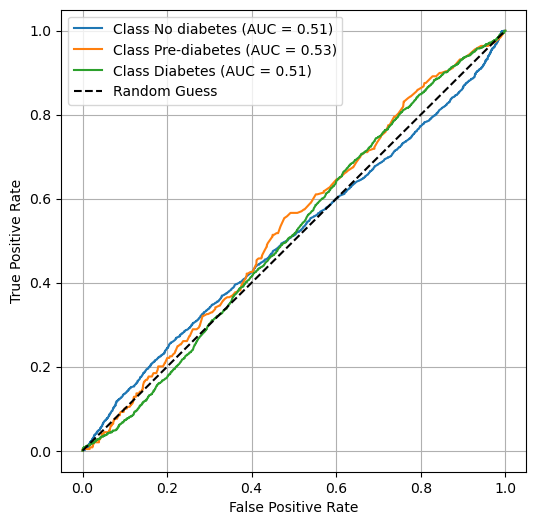

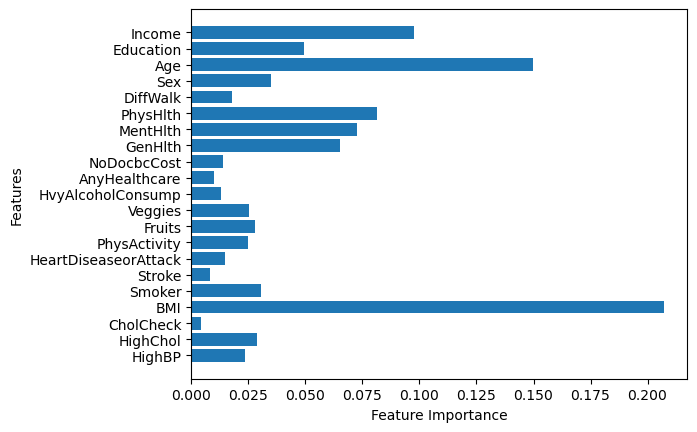

In [31]:
# Bagged RF.
param_grid = { 
    'n_estimators': [5, 10]
}
baggingRFmodel = trainBaggingClassifier(RandomForestClassifier(random_state=seed), param_grid , train_x_up, train_y_up, val_x, val_y)
# Evaluate baggingRFmodel.
baggingRF_y_pred = baggingRFmodel.predict(test_x)
evaluate_model(baggingRFmodel, test_y, baggingRF_y_pred, test_x)
baggingFI(baggingRFmodel, features)

In [32]:
baggingRFmodel

BaggingClassifier(estimator=RandomForestClassifier(random_state=42),
                  random_state=42)

Fitting 8 folds for each of 2 candidates, totalling 16 fits
[CV 1/8; 1/2] START n_estimators=5..............................................
[CV 1/8; 1/2] END ...............n_estimators=5;, score=0.565 total time=  10.8s
[CV 2/8; 1/2] START n_estimators=5..............................................
[CV 2/8; 1/2] END ...............n_estimators=5;, score=0.562 total time=  11.1s
[CV 3/8; 1/2] START n_estimators=5..............................................
[CV 3/8; 1/2] END ...............n_estimators=5;, score=0.578 total time=  11.9s
[CV 4/8; 1/2] START n_estimators=5..............................................
[CV 4/8; 1/2] END ...............n_estimators=5;, score=0.590 total time=  11.7s
[CV 5/8; 1/2] START n_estimators=5..............................................
[CV 5/8; 1/2] END ...............n_estimators=5;, score=0.583 total time=  10.8s
[CV 6/8; 1/2] START n_estimators=5..............................................
[CV 6/8; 1/2] END ...............n_estimators=5;,

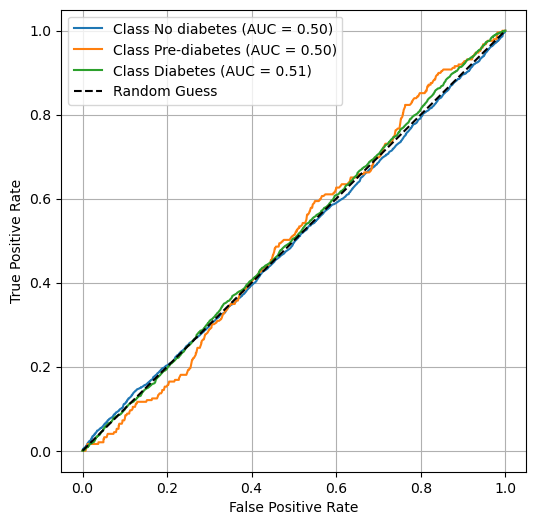

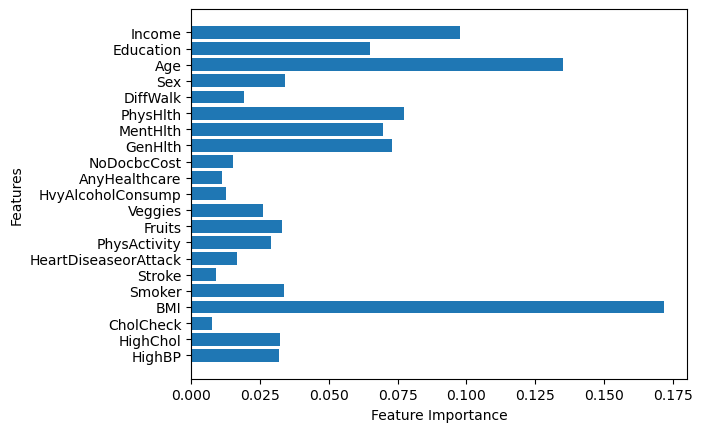

In [33]:
# Bagged RF.
param_grid = {
    'n_estimators': [5, 10]
}
baggingRFmodel = trainBaggingClassifier(RandomForestClassifier(random_state=seed), param_grid , train_x_down, train_y_down, val_x, val_y)
# Evaluate baggingRFmodel.
baggingRF_y_pred = baggingRFmodel.predict(test_x)
evaluate_model(baggingRFmodel, test_y, baggingRF_y_pred, test_x)
baggingFI(baggingRFmodel, features)

In [34]:
baggingRFmodel

BaggingClassifier(estimator=RandomForestClassifier(random_state=42),
                  random_state=42)

Fitting 8 folds for each of 1 candidates, totalling 8 fits
[CV 1/8; 1/1] START n_estimators=3..............................................
[CV 1/8; 1/1] END ...............n_estimators=3;, score=0.739 total time= 6.1min
[CV 2/8; 1/1] START n_estimators=3..............................................
[CV 2/8; 1/1] END ...............n_estimators=3;, score=0.880 total time= 6.0min
[CV 3/8; 1/1] START n_estimators=3..............................................
[CV 3/8; 1/1] END ...............n_estimators=3;, score=0.941 total time= 6.4min
[CV 4/8; 1/1] START n_estimators=3..............................................
[CV 4/8; 1/1] END ...............n_estimators=3;, score=0.941 total time= 6.4min
[CV 5/8; 1/1] START n_estimators=3..............................................
[CV 5/8; 1/1] END ...............n_estimators=3;, score=0.940 total time= 5.8min
[CV 6/8; 1/1] START n_estimators=3..............................................
[CV 6/8; 1/1] END ...............n_estimators=3;, 

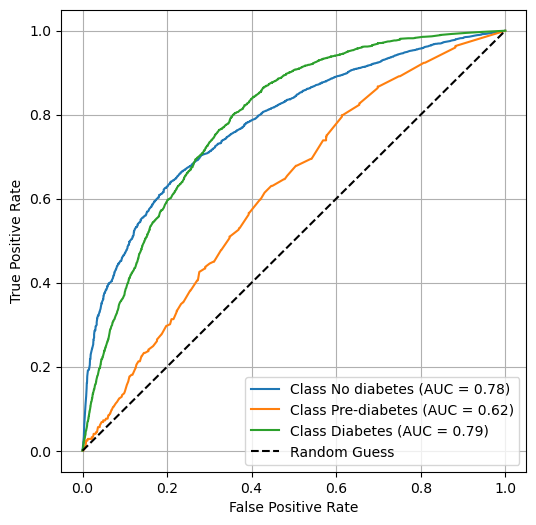

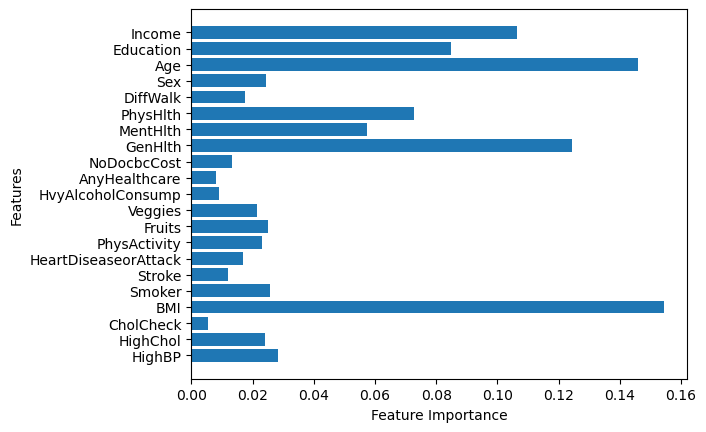

In [35]:
# Bagged RF.
param_grid = {
    'n_estimators': [3]
}
baggingRFmodel = trainBaggingClassifier(RandomForestClassifier(random_state=seed), param_grid , train_x_smote, train_y_smote, val_x, val_y)
# Evaluate baggingRFmodel.
baggingRF_y_pred = baggingRFmodel.predict(test_x)
evaluate_model(baggingRFmodel, test_y, baggingRF_y_pred, test_x)
baggingFI(baggingRFmodel, features)

In [36]:
baggingRFmodel

BaggingClassifier(estimator=RandomForestClassifier(random_state=42),
                  n_estimators=3, random_state=42)

## Stacking

In [22]:
# Stacking.
def trainStackingModel(base_classifiers, meta_classifier, train_x, train_y, val_x, val_y, param_grid):
    
    stacking_model = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier)
    x = np.concatenate((train_x, val_x), axis=0)
    y = np.concatenate((train_y, val_y), axis=0)
    model = hyperparameter_tuning(stacking_model, param_grid, x, y)
    model.fit(train_x, train_y)
    return model

# Important features for stacking
def stackedModelFI(model, train_x, train_y, feature_names):
    results = permutation_importance(model, train_x, train_y, scoring='accuracy')
    important_features = results.importances_mean
    # Plot feature importances.
    plt.barh(feature_names, important_features)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.show()

In [23]:
base_classifiers = [
    ('rf', RandomForestClassifier(random_state = seed)),
    ('dt', DecisionTreeClassifier(random_state = seed)),
    #('gnb', GaussianNB()),
   # ('knn', KNeighborsClassifier()),
   # ('lr', LogisticRegression(random_state = seed)),
    ('xgb', xgb.XGBClassifier(random_state = seed, learning_rate=0.1, max_depth=20))
]
meta_classifier = LogisticRegression(random_state = seed)


Fitting 8 folds for each of 2 candidates, totalling 16 fits
[CV 1/8; 1/2] START final_estimator__C=0.1......................................
[CV 1/8; 1/2] END .......final_estimator__C=0.1;, score=0.992 total time= 9.0min
[CV 2/8; 1/2] START final_estimator__C=0.1......................................
[CV 2/8; 1/2] END .......final_estimator__C=0.1;, score=0.991 total time= 8.0min
[CV 3/8; 1/2] START final_estimator__C=0.1......................................
[CV 3/8; 1/2] END .......final_estimator__C=0.1;, score=0.991 total time= 9.4min
[CV 4/8; 1/2] START final_estimator__C=0.1......................................
[CV 4/8; 1/2] END .......final_estimator__C=0.1;, score=0.992 total time= 9.0min
[CV 5/8; 1/2] START final_estimator__C=0.1......................................
[CV 5/8; 1/2] END .......final_estimator__C=0.1;, score=0.991 total time= 8.2min
[CV 6/8; 1/2] START final_estimator__C=0.1......................................
[CV 6/8; 1/2] END .......final_estimator__C=0.1;,

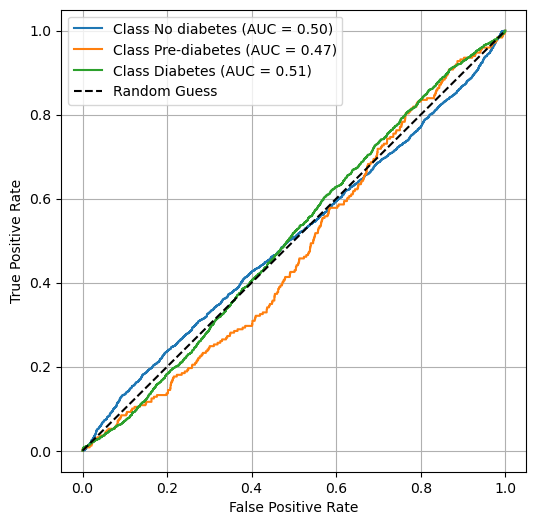

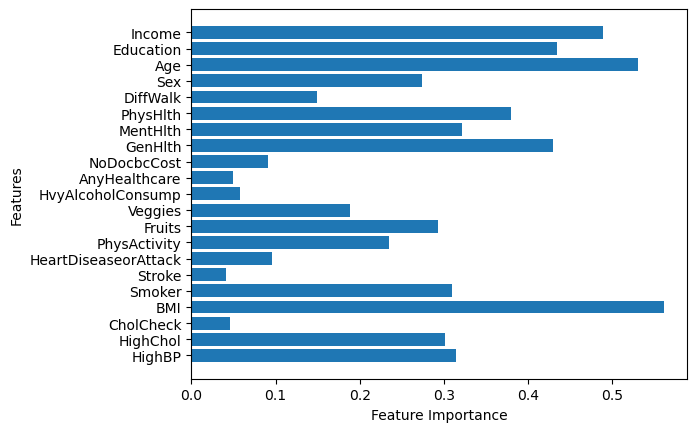

In [39]:
# Evaluate stacking model.
param_grid = {
    'final_estimator__C': [0.1, 1]
}
rfsvmstackedmodel = trainStackingModel(base_classifiers, meta_classifier, train_x_up, train_y_up, val_x, val_y, param_grid)
rfsvmstacked_y_pred = rfsvmstackedmodel.predict(test_x)
evaluate_model(rfsvmstackedmodel, test_y, rfsvmstacked_y_pred, test_x)
stackedModelFI(rfsvmstackedmodel, train_x_up, train_y_up, features)

In [40]:
rfsvmstackedmodel

StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('dt', DecisionTreeClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_type...
                                              interaction_constraints=None,
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=20,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=LogisticRegression(C=1, random_state=42))

Fitting 8 folds for each of 2 candidates, totalling 16 fits
[CV 1/8; 1/2] START final_estimator__C=0.1......................................
[CV 1/8; 1/2] END .......final_estimator__C=0.1;, score=0.594 total time=  33.0s
[CV 2/8; 1/2] START final_estimator__C=0.1......................................
[CV 2/8; 1/2] END .......final_estimator__C=0.1;, score=0.594 total time=  32.1s
[CV 3/8; 1/2] START final_estimator__C=0.1......................................
[CV 3/8; 1/2] END .......final_estimator__C=0.1;, score=0.594 total time=  32.8s
[CV 4/8; 1/2] START final_estimator__C=0.1......................................
[CV 4/8; 1/2] END .......final_estimator__C=0.1;, score=0.594 total time=  31.6s
[CV 5/8; 1/2] START final_estimator__C=0.1......................................
[CV 5/8; 1/2] END .......final_estimator__C=0.1;, score=0.595 total time=  31.1s
[CV 6/8; 1/2] START final_estimator__C=0.1......................................
[CV 6/8; 1/2] END .......final_estimator__C=0.1;,

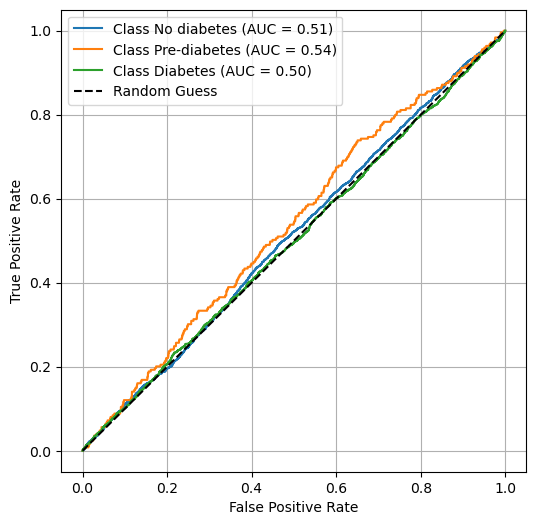

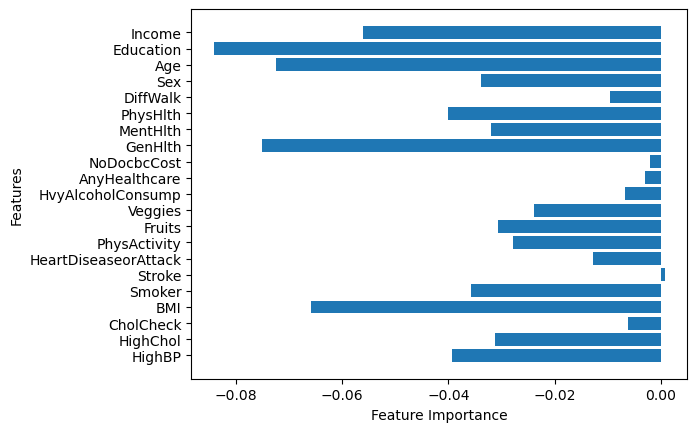

In [41]:
# Evaluate stacking model.
param_grid = {
    'final_estimator__C': [0.1, 1]
}
rfsvmstackedmodel = trainStackingModel(base_classifiers, meta_classifier,  train_x_down, train_y_down, val_x, val_y, param_grid)
rfsvmstacked_y_pred = rfsvmstackedmodel.predict(test_x)
evaluate_model(rfsvmstackedmodel, test_y, rfsvmstacked_y_pred, test_x)
stackedModelFI(rfsvmstackedmodel,  train_x_down, train_y_down, features)

In [42]:
rfsvmstackedmodel

StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('dt', DecisionTreeClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_type...
                                              interaction_constraints=None,
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=20,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=LogisticRegression(C=0.1, random_state=42))

Fitting 8 folds for each of 1 candidates, totalling 8 fits
[CV 1/8; 1/1] START final_estimator__C=0.1......................................
[CV 1/8; 1/1] END .......final_estimator__C=0.1;, score=0.701 total time=18.0min
[CV 2/8; 1/1] START final_estimator__C=0.1......................................
[CV 2/8; 1/1] END .......final_estimator__C=0.1;, score=0.885 total time=18.3min
[CV 3/8; 1/1] START final_estimator__C=0.1......................................
[CV 3/8; 1/1] END .......final_estimator__C=0.1;, score=0.953 total time=19.0min
[CV 4/8; 1/1] START final_estimator__C=0.1......................................
[CV 4/8; 1/1] END .......final_estimator__C=0.1;, score=0.953 total time=17.8min
[CV 5/8; 1/1] START final_estimator__C=0.1......................................
[CV 5/8; 1/1] END .......final_estimator__C=0.1;, score=0.952 total time=17.9min
[CV 6/8; 1/1] START final_estimator__C=0.1......................................
[CV 6/8; 1/1] END .......final_estimator__C=0.1;, 

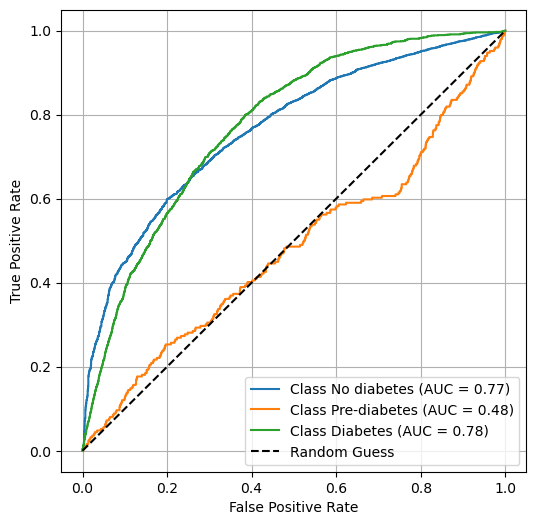

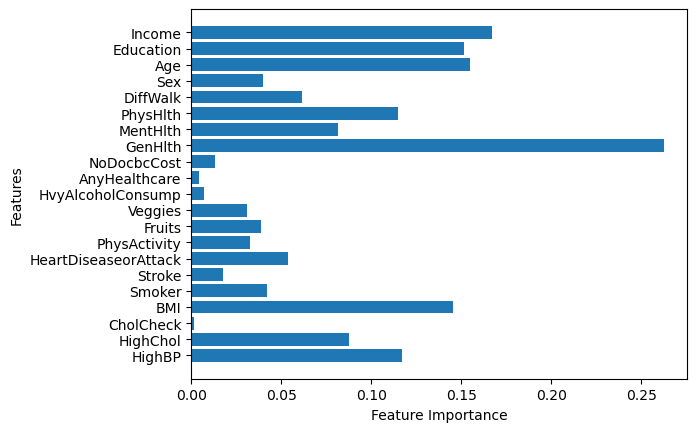

In [24]:
# Evaluate stacking model.
param_grid = {
    'final_estimator__C': [0.1]
}
rfsvmstackedmodel = trainStackingModel(base_classifiers, meta_classifier, train_x_smote, train_y_smote, val_x, val_y, param_grid)
rfsvmstacked_y_pred = rfsvmstackedmodel.predict(test_x)
evaluate_model(rfsvmstackedmodel, test_y, rfsvmstacked_y_pred, test_x)
stackedModelFI(rfsvmstackedmodel, train_x_smote, train_y_smote, features)

In [25]:
rfsvmstackedmodel

StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('dt', DecisionTreeClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_type...
                                              interaction_constraints=None,
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=20,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=LogisticRegression(C=0.1, random_state=42))